In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [11]:
data = pd.read_csv('data/hurdat2-formattted.csv', sep = ";")
data.head()

,Identifier,Name,Date,Time,Land,System Status,Longitude,Latitude,Max wind,Min pressure,...,34 kt wind radii southwestern,34 kt wind radii southwestern.1,50 kt wind northeastern,50 kt wind radii southeastern,50 kt wind radii southwestern,50 kt wind radii southwestern.1,64 kt wind northeastern,64 kt wind radii southeastern,64 kt wind radii southwestern,64 kt wind radii southwestern.1
0,AL011851,UNNAMED,18510625,0,0,HU,-94.8,28.0,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,0,HU,-95.4,28.0,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,0,HU,-96.0,28.0,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,0,HU,-96.5,28.1,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,1,HU,-96.8,28.2,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [12]:
# Data cleaning
columns_to_drop = ['Name', 'Date', 'Time']

for column in columns_to_drop:
    if column in data.columns:
        data.drop(column, axis = 1, inplace = True)
        print("Colum '{}' dropped".format(column))
    else:
        print("Column '{}' already has been dropped".format(column))

Colum 'Name' dropped
Colum 'Date' dropped
Colum 'Time' dropped


In [13]:
# One Hot Encoding: System Status column
data = pd.get_dummies(data, columns = ['System Status'])

In [14]:
data

,Identifier,Land,Longitude,Latitude,Max wind,Min pressure,34 kt wind northeastern,34 kt wind radii southeastern,34 kt wind radii southwestern,34 kt wind radii southwestern.1,...,System Status_DB,System Status_ET,System Status_EX,System Status_HU,System Status_LO,System Status_SD,System Status_SS,System Status_TD,System Status_TS,System Status_WV
0,AL011851,0,-94.8,28.0,80,-999,-999,-999,-999,-999,...,0,0,0,1,0,0,0,0,0,0
1,AL011851,0,-95.4,28.0,80,-999,-999,-999,-999,-999,...,0,0,0,1,0,0,0,0,0,0
2,AL011851,0,-96.0,28.0,80,-999,-999,-999,-999,-999,...,0,0,0,1,0,0,0,0,0,0
3,AL011851,0,-96.5,28.1,80,-999,-999,-999,-999,-999,...,0,0,0,1,0,0,0,0,0,0
4,AL011851,1,-96.8,28.2,80,-999,-999,-999,-999,-999,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51341,AL162018,1,-19.6,57.9,55,960,780,600,660,480,...,0,0,1,0,0,0,0,0,0,0
51342,AL162018,1,-17.1,58.9,50,964,480,600,660,420,...,0,0,1,0,0,0,0,0,0,0
51343,AL162018,1,-14.5,59.8,45,968,360,480,480,360,...,0,0,1,0,0,0,0,0,0,0
51344,AL162018,1,-12.1,60.8,40,973,270,330,360,270,...,0,0,1,0,0,0,0,0,0,0


In [15]:
def print_and_plot(classifier, y_test, y_prediction):
  cm = confusion_matrix(y_test, y_prediction)
  print(classification_report(y_test, y_prediction))

  print("\nConfusion Matrix values:")
  print(cm)

  print("\nConfusion Matrix normalized")
  cm_plot = plot_confusion_matrix(
      classifier, X_test, y_test,
      cmap=plt.cm.Blues,
      normalize = 'true'
  )
  plt.show()

  print("\nROC Curve")
  rc_disp = plot_roc_curve(classifier, X_test, y_test)
  plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14215
           1       0.96      0.89      0.92      2730

    accuracy                           0.98     16945
   macro avg       0.97      0.94      0.95     16945
weighted avg       0.98      0.98      0.98     16945


Confusion Matrix values:
[[14110   105]
 [  300  2430]]

Confusion Matrix normalized


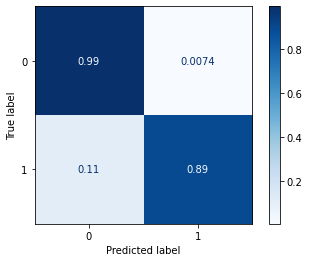


ROC Curve


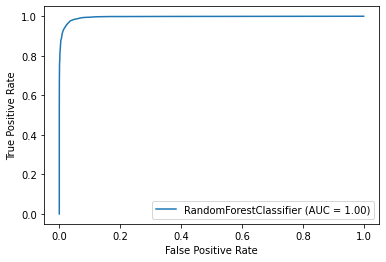

In [16]:
# Version a: Training whole dataset
y = data['Land']
X = data.drop(['Land', 'Identifier'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size    = 0.33,
    random_state = 42
)

rf_a = RandomForestClassifier(
    random_state = 17,
    verbose = 0
)

rf_a.fit(X_train, y_train)

y_prediction = rf_a.predict(X_test)

print_and_plot(rf_a, y_test, y_prediction)

In [18]:
# Version b: using grird search to obtain best params
param_grid = [
    {
        'n_estimators': [30, 40, 50, 60],
        'max_features': [4, 8, 15, 20, 26]
    },
    {
        'bootstrap': [False],
        'n_estimators': [30, 40, 50, 60],
        'max_features': [4, 8, 15, 20, 26]
    }
]

rf_grid_search = RandomForestClassifier(
    random_state = 17,
    verbose = 0
)

grid_search = GridSearchCV(
    rf_grid_search,
    param_grid,
    cv=10,
    scoring="f1",
    return_train_score=True
)

grid_search.fit(X_train, y_train)
cvres = grid_search.cv_results_

print("\nBest params: {}\n".format(grid_search.best_params_))

Best params: {'max_features': 26, 'n_estimators': 60}
nan {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 4, 'n_estimators': 40}
nan {'max_features': 4, 'n_estimators': 50}
nan {'max_features': 4, 'n_estimators': 60}
nan {'max_features': 8, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 40}
nan {'max_features': 8, 'n_estimators': 50}
nan {'max_features': 8, 'n_estimators': 60}
nan {'max_features': 15, 'n_estimators': 30}
nan {'max_features': 15, 'n_estimators': 40}
nan {'max_features': 15, 'n_estimators': 50}
nan {'max_features': 15, 'n_estimators': 60}
nan {'max_features': 20, 'n_estimators': 30}
nan {'max_features': 20, 'n_estimators': 40}
nan {'max_features': 20, 'n_estimators': 50}
nan {'max_features': 20, 'n_estimators': 60}
nan {'max_features': 26, 'n_estimators': 30}
nan {'max_features': 26, 'n_estimators': 40}
nan {'max_features': 26, 'n_estimators': 50}
nan {'max_features': 26, 'n_estimators': 60}
nan {'bootstrap': False, 'max_features': 4, 'n_estimat

<ipython-input-18-7eec8adbd83f>:33: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, X_train.columns), reverse=True)

[(0.5171196841217689, 'Longitude'),
 (0.4020216540178943, 'Latitude'),
 (0.03576535964136791, 'Max wind'),
 (0.019603743156869344, 'System Status_EX'),
 (0.009978619711947662, 'Min pressure'),
 (0.003036436326491529, 'System Status_TD'),
 (0.0016492995219277696, 'System Status_HU'),
 (0.0016331934235584405, 'System Status_TS'),
 (0.001455925047990984, '34 kt wind radii southwestern.1'),
 (0.0014438704977330443, '34 kt wind radii southeastern'),
 (0.0011211371470319636, '34 kt wind northeastern'),
 (0.0007916736761781581, '34 kt wind radii southwestern'),
 (0.0006728212258034022, '50 kt wind radii southeastern'),
 (0.0005520248638804644, '50 kt wind northeastern'),
 (0.0005067094472769474, '50 kt wind radii southwestern.1'),
 (0.0004461358865129061, 'System Status_LO'),
 (0.0003889152052690619, '64 kt wind northeastern'),
 (0.0003750649512804725, '50 kt wind radii southwestern'),
 (0.00036571879969390394, '64 kt wind radii southwestern'),
 (0.00032684665783953913, '64 kt wind radii sout

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14215
           1       0.98      0.96      0.97      2730

    accuracy                           0.99     16945
   macro avg       0.98      0.98      0.98     16945
weighted avg       0.99      0.99      0.99     16945


Confusion Matrix values:
[[14151    64]
 [  116  2614]]

Confusion Matrix normalized


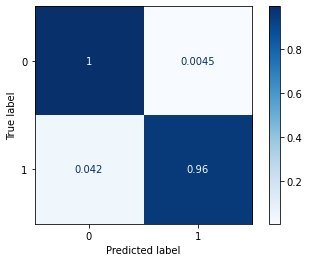


ROC Curve


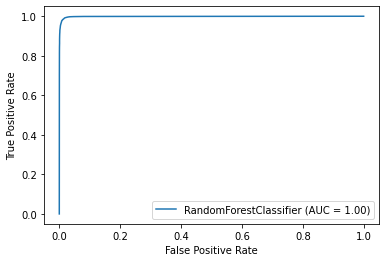

In [ ]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
print_and_plot(final_model, y_test, final_predictions)

In [ ]:
# Create array with hurricanes
hurricanes = {}
hurricane_identifiers = data['Identifier'].unique()

for hurricane_id in tqdm(hurricane_identifiers):
    hurricanes[hurricane_id] = data[data['Identifier'] == hurricane_id].drop('Identifier', axis = 1)

100%|██████████| 1873/1873 [00:09<00:00, 190.80it/s]


In [ ]:
# Now, you can predict hurricanes!
hurricane_to_predict = hurricanes['AL162018']

hurricane_data_to_predict = hurricane_to_predict.drop('Land', axis = 1)

hurricane_row_to_predict = hurricane_data_to_predict[15:16]
print("Prediction: {} vs fact: {}".format(final_model.predict(hurricane_row_to_predict), hurricane_to_predict[15:16]['Land'].values))

hurricane_row_to_predict = hurricane_data_to_predict[20:21]
print("Prediction: {} vs fact: {}".format(final_model.predict(hurricane_row_to_predict), hurricane_to_predict[20:21]['Land'].values))

hurricane_row_to_predict = hurricane_data_to_predict[25:26]
print("Prediction: {} vs fact: {}".format(final_model.predict(hurricane_row_to_predict), hurricane_to_predict[25:26]['Land'].values))


Prediction: [0] vs fact: [0]
Prediction: [0] vs fact: [0]
Prediction: [1] vs fact: [1]
